# Exploring errors 

In [1]:
# libraries and setup
library(data.table)
library(ggplot2)

# setup plot size
options(repr.plot.width=8, repr.plot.height=4)
set.seed(123)

# Random vs sistematic error (variable)

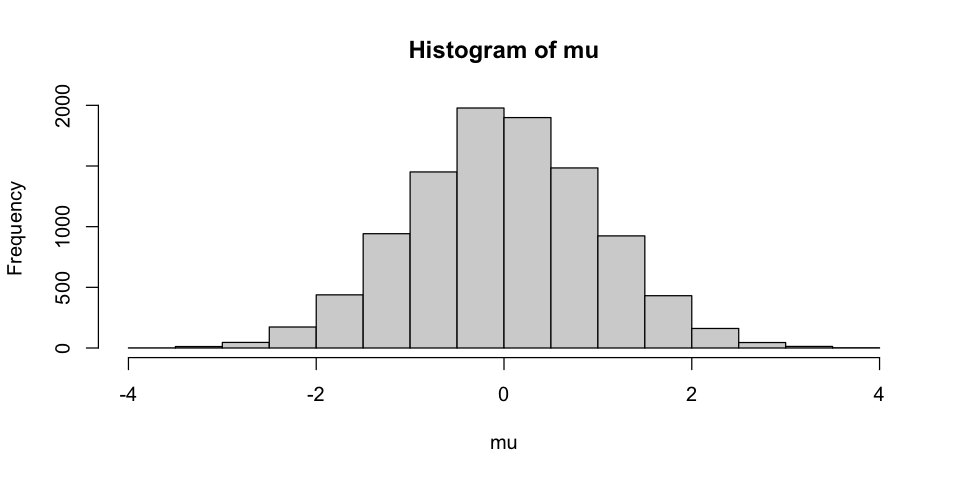

In [2]:
# simulate real variable of interest

nsize = 10000
mu = rnorm(nsize, mean=0, sd=1)
hist(mu)

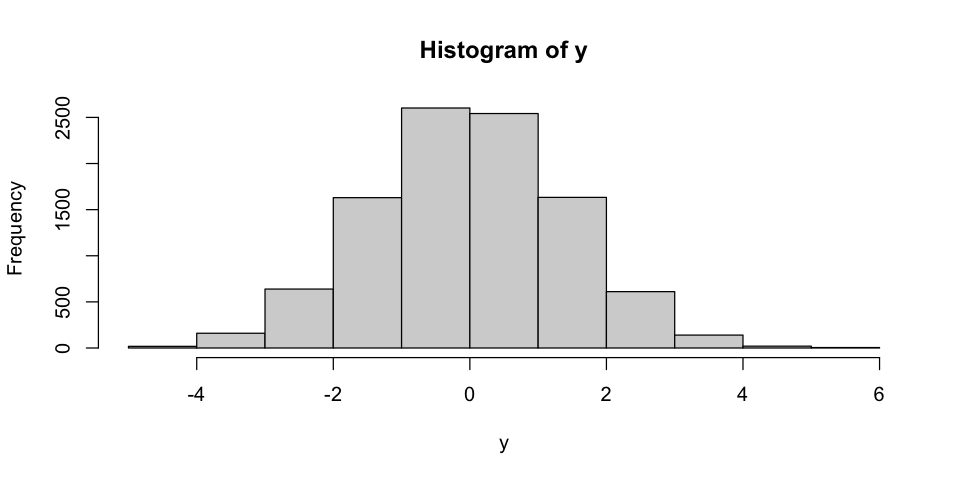

In [3]:
# create error variable
error = rnorm(nsize, mean=0, sd=1)

# observed variable
y = mu + error
hist(y)

In [4]:
# let's explore dispersion

print(paste0('mu standard deviation: ', round(sd(mu),4)))
print(paste0('y standard deviation: ', round(sd(y),4)))

[1] "mu standard deviation: 0.9986"
[1] "y standard deviation: 1.4186"


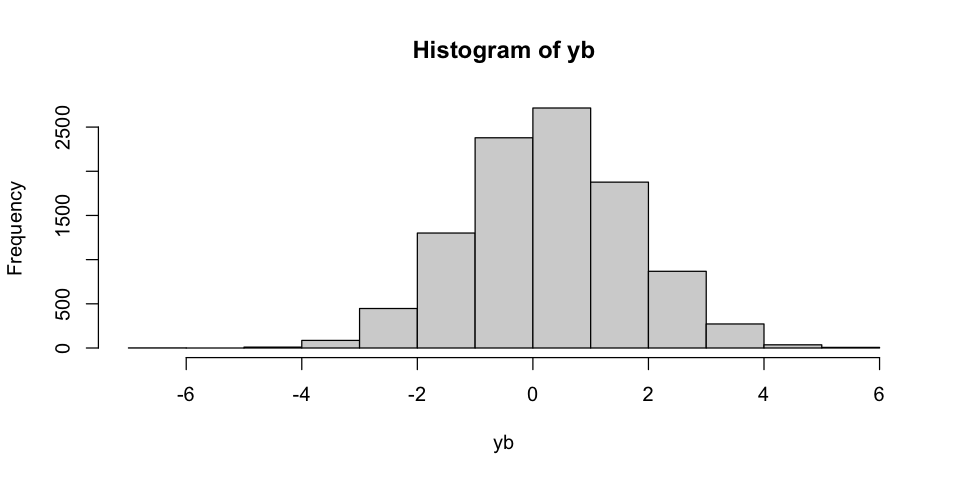

In [5]:
# let's add some systematic bias

berror = rnorm(nsize, mean=0.3, sd=1)
yb = mu + berror
hist(yb)

In [6]:
print(paste0('mu mean: ', round(mean(mu),4)))
print(paste0('yb mean: ', round(mean(yb),4)))
print(paste0('mu standard deviation: ', round(sd(mu),4)))
print(paste0('yb standard deviation: ', round(sd(yb),4)))

[1] "mu mean: -0.0024"
[1] "yb mean: 0.2905"
[1] "mu standard deviation: 0.9986"
[1] "yb standard deviation: 1.4276"


# Sampling error

## Unbiased

In [24]:
# Get multiple samples from a population
population = rnorm(10000)

unbiased = NULL
for (i in 1:1000) {
    unbiased = c(unbiased, mean(sample(population, 100)))
}

[1] "mean 0.004"
[1] "standard error 0.096"


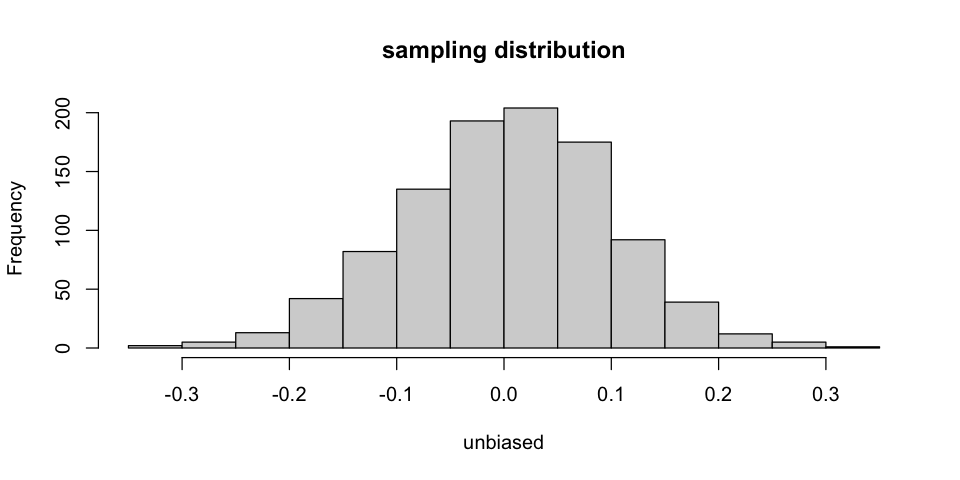

In [25]:
print(paste0('mean ' , round(mean(unbiased),3)))
print(paste0('standard error ' , round(sd(unbiased),3)))
hist(unbiased, main='sampling distribution')

# Biased 

In [26]:
biased = NULL
for (i in 1:1000) {
    biased = c(biased,        
        mean(
            c(sample(population[population>0.3], 60), sample(population[population<=0.3], 40))
            )
        )
}

[1] "mean 0.349"
[1] "standard error 0.061"


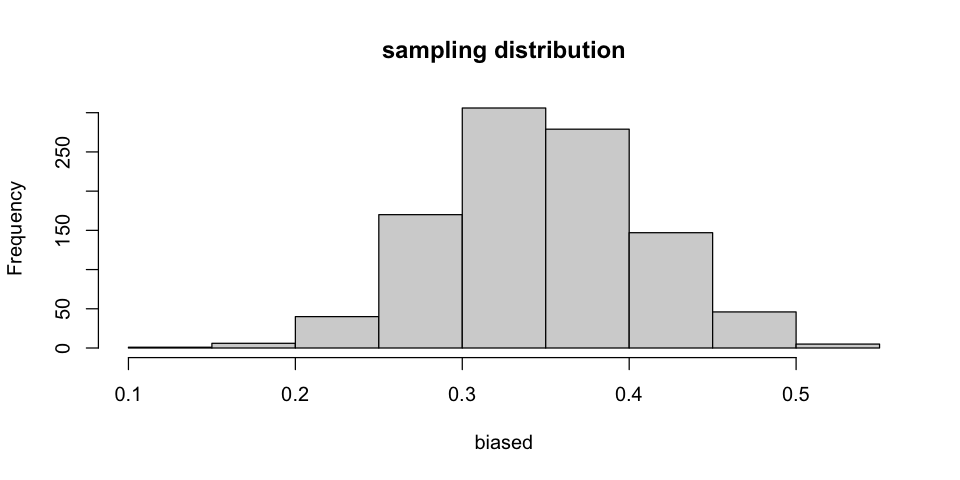

In [27]:
print(paste0('mean ' , round(mean(biased),3)))
print(paste0('standard error ' , round(sd(biased),3)))
hist(biased, main='sampling distribution')

# Validation versus Bias

In [36]:
# let's define a construct or gold standard

mu = rnorm(10000)

# now an observed variable related to the construct

y = mu*0.3 + rnorm(10000)

# the correlation would be

print(paste0('correlation observed and gold standard: ', round(cor(y, mu), 3)))

[1] "correlation observed and gold standard: 0.281"


In [43]:
# now, let's add a bias of 0.4 to the observed variable

yb = y + 0.4
print(paste0('mean mu or gold standard: ', round(mean(mu), 3)))
print(paste0('mean unbiased y: ', round(mean(y), 3)))
print(paste0('mean biased y: ', round(mean(yb), 3)))

# what about the correlation?
print(paste0('correlation biased y and gold standard: ', round(cor(yb, mu), 3)))

# there is no effect on the correlation ~ validity, but yb is clearly biased

[1] "mean mu or gold standard: 0.01"
[1] "mean unbiased y: 0.017"
[1] "mean biased y: 0.417"
[1] "correlation biased y and gold standard: 0.281"


# Reliabity and cronbach's alpha

In [57]:
# let's create a simple function

alpha = function(k, r) {
    # k: number of items
    # r: average correlation between each pair of  between items
    return(k*r/(1 + (k-1)*r))
}

# only increasing the number of items will increase alpha
print(paste0('alpha with 10 items: ', round(alpha(10, 0.3), 3)))
print(paste0('alpha with 30 items: ', round(alpha(30, 0.3), 3)))
print(paste0('alpha with 50 items: ', round(alpha(50, 0.3), 3)))

[1] "alpha with 10 items: 0.811"
[1] "alpha with 30 items: 0.928"
[1] "alpha with 50 items: 0.955"
